# Transformación de perspectiva


## Transformación afín

En una transformación afín, todas las líneas paralelas en la imagen original se mantienen paralelas en la imagen transformada. Para definir una matriz de transformación afín, se necesitan tres puntos en la imagen original y los correspondientes tres puntos en la imagen transformada. Con esto, se puede usar la función `getAffineTransform` para obtener una matriz de transformación que se puede usar en la función `warpAffine`.


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]    # incrementar tamaño de plots

def display2(img1, img2):
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title("Filtrada")
    plt.xticks([])
    plt.yticks([])

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


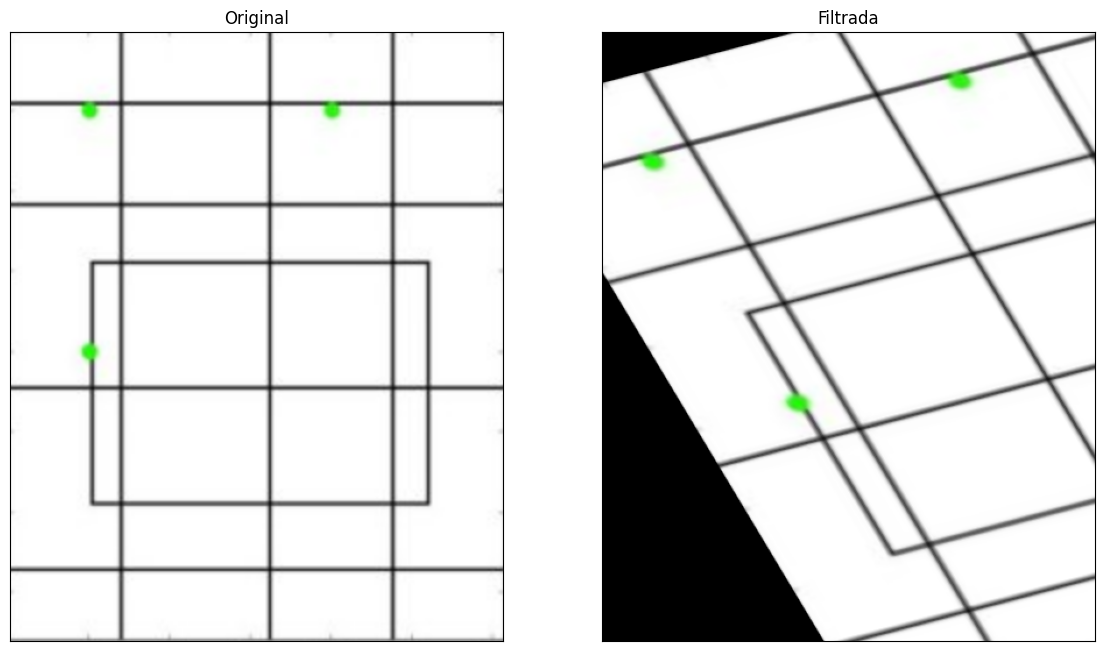

In [3]:
img = cv2.imread("affine.png")

filas, cols, ch = img.shape

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
print(M)

img_tr = cv2.warpAffine(img, M, (cols, filas))

display2(img, img_tr)

## Transformación de perspectiva
Para una transformación de perspectiva, se necesita una matriz de transformación de dimensiones 3x3. Las líneas rectas en la imagen original se mantendrán como líneas rectas en la imagen transformada. Para poder encontrar esta transformación, se necesita definir **4 puntos** en ambas imágenes. Es importante considerar que de los 4 puntos, 3 de ellos no deben ser colineales. La matriz de transformación se puede hallar usando la función `getPerspectiveTransform`. Y luego aplicar la transformacion con la funcion `warpPerspective`.


[[ 1.05587376e+00  9.18151097e-02 -6.50969128e+01]
 [ 4.69010049e-02  1.12562412e+00 -7.57920240e+01]
 [ 1.83251448e-04  5.13337001e-04  1.00000000e+00]]


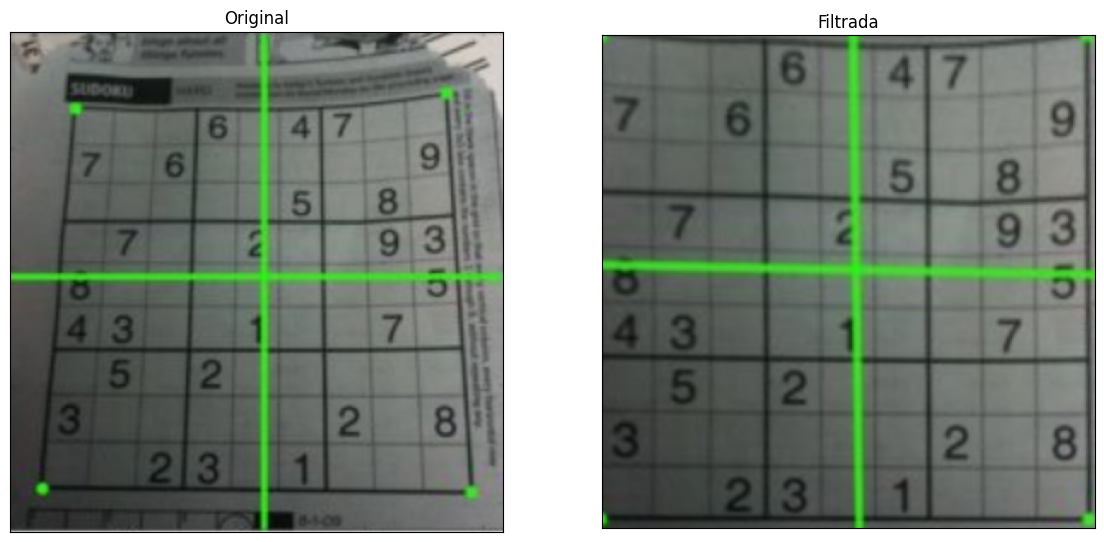

In [4]:
img = cv2.imread("sudoku_perspective.png")
filas, cols, ch = img.shape


pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
img_tr = cv2.warpPerspective(img,M,(300,300))

display2(img, img_tr)

## Ejercicio

Transformar la perspectiva de las siguientes imágenes:

![parking](parking.jpg)

![parking2](parking2.jpg)

Para la siguiente imagen, además de transformar la perspectiva, también rotar la imagen para que se pueda leer el texto:


![parking3](parking3.jpg)

(320, 450, 3)
[[ 5.17241379e+00  5.17241379e+00 -8.27586207e+02]
 [ 1.03351671e-15  4.96551724e+01 -2.23448276e+03]
 [ 4.73041785e-18  4.48275862e-02  1.00000000e+00]]


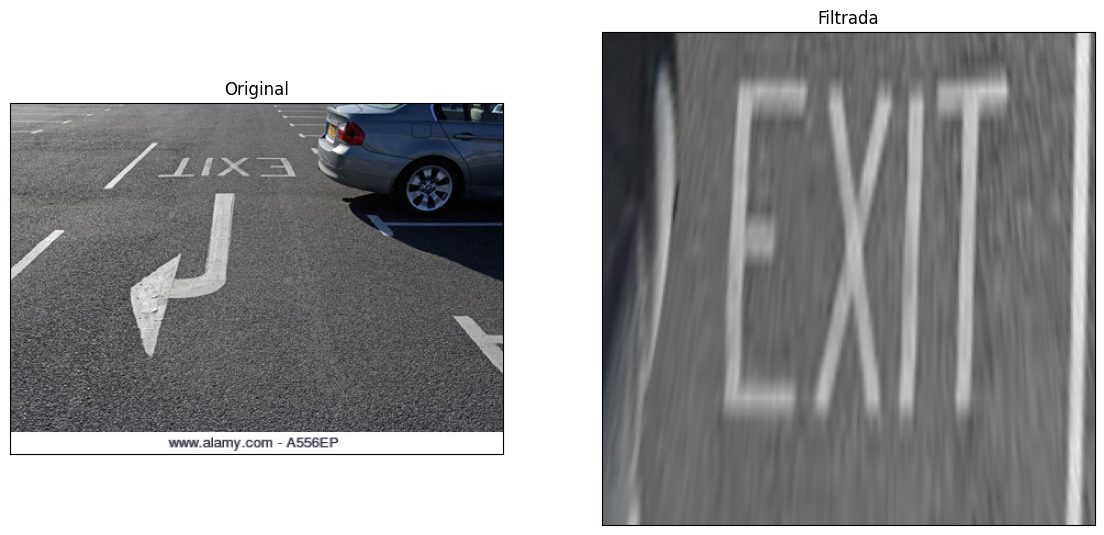

In [5]:
parking = cv2.imread("parking3.jpg")
pts1 = np.float32([[115, 45],[290,45],[90, 70],[330,70]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
print(parking.shape)
M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
img_tr = cv2.warpPerspective(parking,M,(300,300))
theta = 180
#                           (centro x      , centro y        , theta, escala)
M_r = cv2.getRotationMatrix2D(((300 - 1) / 2, (300 - 1) / 2), theta, 1)
#                     (img, matriz, size) 
img_final = cv2.warpAffine(img_tr, M_r, (300, 300))
display2(parking, img_final)

In [6]:
def display_gray_row(*imgs):
    for i, img in enumerate(imgs):
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

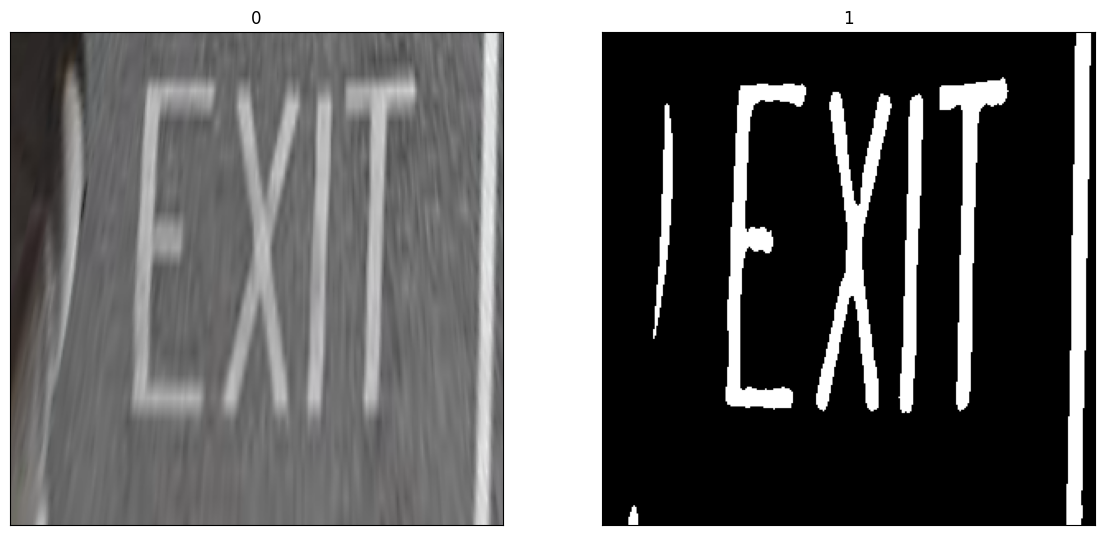

In [7]:
img_blur = cv2.GaussianBlur(cv2.cvtColor(img_final, cv2.COLOR_BGR2GRAY), (5, 5), 0)
res, th3 = cv2.threshold(img_blur, 150, 255, cv2.THRESH_BINARY)

display_gray_row(img_final,th3)
